In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy.stats import ttest_ind 
warnings.filterwarnings('ignore')  
%matplotlib inline
# sns Theme 
sns.set_style('darkgrid') 
# limiting the number of decimals.
pd.set_option('display.float_format', lambda x : '{:.3f}'.format(x))

In [2]:
clinical_df = pd.read_csv('train_clinical_data.csv')
peptides_df = pd.read_csv('train_peptides.csv')
proteins_df = pd.read_csv('train_proteins.csv')
supplemental_df = pd.read_csv('supplemental_clinical_data.csv')

In [3]:
# Checking Dataset shape
print(clinical_df.shape, peptides_df.shape, proteins_df.shape,supplemental_df.shape)

(2615, 8) (981834, 6) (232741, 5) (2223, 8)


In [4]:
# Columns for each CSV
print({'clinical':clinical_df.columns.tolist(),
       'peptides':peptides_df.columns.tolist(),
       'proteins':proteins_df.columns.tolist(),
       'supplemental':supplemental_df.columns.tolist()
       }) 

{'clinical': ['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'], 'peptides': ['visit_id', 'visit_month', 'patient_id', 'UniProt', 'Peptide', 'PeptideAbundance'], 'proteins': ['visit_id', 'visit_month', 'patient_id', 'UniProt', 'NPX'], 'supplemental': ['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication']}


In [5]:
clinical_df.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.000,6.000,15.000,NaN,NaN
1,55_3,55,3,10.000,7.000,25.000,NaN,NaN
2,55_6,55,6,8.000,10.000,34.000,NaN,NaN
3,55_9,55,9,8.000,9.000,30.000,0.000,On
4,55_12,55,12,10.000,10.000,41.000,0.000,On


In [6]:
clinical_df.tail()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
2610,65043_48,65043,48,7.000,6.000,13.000,0.000,Off
2611,65043_54,65043,54,4.000,8.000,11.000,1.000,Off
2612,65043_60,65043,60,6.000,6.000,16.000,1.000,Off
2613,65043_72,65043,72,3.000,9.000,14.000,1.000,Off
2614,65043_84,65043,84,7.000,9.000,20.000,3.000,Off


In [7]:
clinical_df.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,2615.000,2615.000,2614.000,2613.000,2590.000,1577.000
mean,32651.744,31.191,7.111,6.744,19.421,1.862
std,18535.759,25.199,5.526,6.323,15.000,3.022
min,55.000,0.000,0.000,0.000,0.000,0.000
25%,16574.000,10.500,3.000,1.000,6.000,0.000
50%,29417.000,24.000,6.000,5.000,19.000,0.000
75%,50611.000,48.000,10.000,10.000,29.000,3.000
max,65043.000,108.000,33.000,40.000,86.000,20.000


In [8]:
clinical_df.groupby('patient_id').nunique()


,visit_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
patient_id,,,,,,,
55,13,13,8,9,10,1,1
942,15,15,7,7,13,2,1
1517,10,10,6,8,8,7,2
1923,7,7,3,2,4,0,0
2660,6,6,5,1,3,0,0
...,...,...,...,...,...,...,...
63875,9,9,6,3,4,1,0
63889,10,10,4,8,10,4,2
64669,15,15,8,9,12,1,2


In [9]:
clinical_df.isna().sum()/len(clinical_df)

visit_id                              0.000
patient_id                            0.000
visit_month                           0.000
updrs_1                               0.000
updrs_2                               0.001
updrs_3                               0.010
updrs_4                               0.397
upd23b_clinical_state_on_medication   0.507
dtype: float64

In [10]:
peptides_df.describe()

,visit_month,patient_id,PeptideAbundance
count,981834.000,981834.000,981834.000
mean,26.105,32603.465,642890.246
std,22.914,18605.934,3377989.093
min,0.000,55.000,10.998
25%,6.000,16566.000,28174.250
50%,24.000,29313.000,74308.300
75%,48.000,49995.000,221338.750
max,108.000,65043.000,178752000.000


In [11]:
peptides_df.isna().sum()

visit_id            0
visit_month         0
patient_id          0
UniProt             0
Peptide             0
PeptideAbundance    0
dtype: int64

In [12]:
peptides_df.groupby('patient_id').nunique()

,visit_id,visit_month,UniProt,Peptide,PeptideAbundance
patient_id,,,,,
55,4,4,226,958,3742
942,4,4,223,950,3620
1517,4,4,226,947,3631
1923,3,3,219,934,2642
2660,5,5,224,946,4481
...,...,...,...,...,...
63875,5,5,225,947,4534
63889,6,6,205,876,4252
64669,5,5,213,930,4364


In [13]:
peptides_df.groupby('Peptide').nunique()


,visit_id,visit_month,patient_id,UniProt,PeptideAbundance
Peptide,,,,,
AADDTWEPFASGK,1069,15,248,1,1066
AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,1049,15,245,1,1049
AAFTEC(UniMod_4)C(UniMod_4)QAADK,1107,15,248,1,1105
AANEVSSADVK,909,15,243,1,908
AATGEC(UniMod_4)TATVGKR,914,14,240,1,913
...,...,...,...,...,...
YVNKEIQNAVNGVK,1111,15,248,1,1110
YWGVASFLQK,1089,15,248,1,1085
YYC(UniMod_4)FQGNQFLR,1105,15,248,1,1103


In [14]:
peptides_df.groupby('UniProt').nunique()


,visit_id,visit_month,patient_id,Peptide,PeptideAbundance
UniProt,,,,,
O00391,764,15,223,1,763
O00533,1112,15,248,8,8278
O00584,1100,15,248,2,2054
O14498,1032,15,245,1,1032
O14773,1047,15,247,2,1700
...,...,...,...,...,...
Q9UHG2,1113,15,248,4,4083
Q9UKV8,907,15,241,1,907
Q9UNU6,761,15,219,1,759


In [15]:
supplemental_df.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,2223.000,2223.000,2010.000,2009.000,2218.000,1295.000
mean,32478.016,12.910,5.684,6.508,22.918,0.840
std,18637.563,13.061,4.367,4.968,12.343,1.860
min,35.000,0.000,0.000,0.000,0.000,0.000
25%,16703.000,0.000,2.000,2.000,14.000,0.000
50%,32915.000,6.000,5.000,5.000,22.000,0.000
75%,47243.000,24.000,8.000,10.000,31.000,0.000
max,65530.000,36.000,27.000,34.000,72.000,12.000


In [16]:
supplemental_df.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.000,3.000,16.000,0.000,NaN
1,35_36,35,36,6.000,4.000,20.000,0.000,NaN
2,75_0,75,0,4.000,6.000,26.000,0.000,NaN
3,75_36,75,36,1.000,8.000,38.000,0.000,On
4,155_0,155,0,NaN,NaN,0.000,NaN,NaN


In [17]:
supplemental_df.tail()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
2218,65382_0,65382,0,NaN,NaN,0.000,NaN,NaN
2219,65405_0,65405,0,5.000,16.000,31.000,0.000,NaN
2220,65405_5,65405,5,NaN,NaN,57.000,NaN,NaN
2221,65530_0,65530,0,10.000,6.000,24.000,0.000,NaN
2222,65530_36,65530,36,8.000,4.000,15.000,4.000,On


In [18]:
supplemental_df.groupby('patient_id').nunique()

,visit_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
patient_id,,,,,,,
35,2,2,2,2,2,1,0
75,2,2,2,2,2,1,1
155,1,1,0,0,1,0,0
337,2,2,2,1,2,1,1
527,2,2,2,2,2,1,1
...,...,...,...,...,...,...,...
65290,5,5,3,4,4,2,1
65303,2,2,2,2,2,1,0
65382,1,1,0,0,1,0,0


In [19]:
clinical_with_medication = clinical_df.query('upd23b_clinical_state_on_medication.notna()',engine='python')

#drop any NA in UDPRS
clinical_with_medication = clinical_with_medication.dropna(subset=['updrs_3','updrs_4']).reset_index(drop=True)

clinical_with_medication.groupby('upd23b_clinical_state_on_medication')[['updrs_1','updrs_2','updrs_3','updrs_4']].describe()

updrs_1                                \
                                      count  mean   std   min   25%   50%   
upd23b_clinical_state_on_medication                                         
Off                                 506.000 8.804 5.466 0.000 5.000 8.000   
On                                  753.000 9.819 5.971 0.000 5.000 9.000   

                                                  updrs_2         ... updrs_3  \
                                       75%    max   count   mean  ...     75%   
upd23b_clinical_state_on_medication                               ...           
Off                                 12.000 31.000 506.000 10.047  ...  38.000   
On                                  14.000 31.000 753.000  9.619  ...  31.000   

                                           updrs_4                          \
                                       max   count  mean   std   min   25%   
upd23b_clinical_state_on_medication                                          
Off                                 78.000 506.000 1.986 2.690 0.000 0.000   
On                                  86.000 753.000 2.444 3.509 0.000 0.000   

                                                        
                                      50%   75%    max  
upd23b_clinical_state_on_medication                     
Off                                 0.000 4.000 13.000  
On                                  0.000 4.000 20.000  

[2 rows x 32 columns]

In [20]:
medication_yes = clinical_with_medication[clinical_with_medication['upd23b_clinical_state_on_medication']=='On']
medication_no = clinical_with_medication[clinical_with_medication['upd23b_clinical_state_on_medication']=='Off']

print(f"UPDRS-1 P-value: {ttest_ind(medication_yes['updrs_1'],medication_no['updrs_1'])[1]}") 
print(f"UPDRS-2 P-value: {ttest_ind(medication_yes['updrs_2'],medication_no['updrs_2'])[1]}") 
print(f"UPDRS-3 P-value: {ttest_ind(medication_yes['updrs_3'],medication_no['updrs_3'])[1]}") 
print(f"UPDRS-4 P-value: {ttest_ind(medication_yes['updrs_4'],medication_no['updrs_4'])[1]}") 



UPDRS-1 P-value: 0.0022709320406333277
UPDRS-2 P-value: 0.2260236702427076
UPDRS-3 P-value: 3.113713538894409e-18
UPDRS-4 P-value: 0.013179351520906555


In [21]:
clinical_df.visit_id = clinical_df.visit_id.astype(str)
peptides_df.visit_id = peptides_df.visit_id.astype(str)
proteins_df.visit_id = proteins_df.visit_id.astype(str)


clinical_peptides_df = pd.merge(clinical_df,peptides_df,on='visit_id')

#checking if both have same patient_id and visit_month. if yes, drop any one of these column

if len(clinical_peptides_df.query('patient_id_x!=patient_id_y & visit_month_x!=visit_month_y'))==0:
    clinical_peptides_df = pd.merge(clinical_df,peptides_df.drop(['patient_id','visit_month'],axis=1),on='visit_id')

clinical_peptides_df

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,UniProt,Peptide,PeptideAbundance
0,55_0,55,0,10.000,6.000,15.000,NaN,NaN,O00391,NEQEQPLGQWHLS,11254.300
1,55_0,55,0,10.000,6.000,15.000,NaN,NaN,O00533,GNPEPTFSWTK,102060.000
2,55_0,55,0,10.000,6.000,15.000,NaN,NaN,O00533,IEIPSSVQQVPTIIK,174185.000
3,55_0,55,0,10.000,6.000,15.000,NaN,NaN,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.900
4,55_0,55,0,10.000,6.000,15.000,NaN,NaN,O00533,SMEQNGPGLEYR,30838.700
...,...,...,...,...,...,...,...,...,...,...,...
941739,65043_48,65043,48,7.000,6.000,13.000,0.000,Off,Q9UHG2,ILAGSADSEGVAAPR,185566.000
941740,65043_48,65043,48,7.000,6.000,13.000,0.000,Off,Q9UKV8,SGNIPAGTTVDTK,39046.700
941741,65043_48,65043,48,7.000,6.000,13.000,0.000,Off,Q9Y646,LALLVDTVGPR,20198.800
941742,65043_48,65043,48,7.000,6.000,13.000,0.000,Off,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,11124.100


In [22]:
pro_1 = pd.read_csv('protein_udprs_1_top_10.csv')
pro_2 = pd.read_csv('protein_udprs_2_top_10.csv')
pro_3 = pd.read_csv('protein_udprs_3_top_10.csv')
pro_4 = pd.read_csv('protein_udprs_4_top_10.csv')
pep_1 = pd.read_csv('peptide_udprs_1_top_10.csv')
pep_2 = pd.read_csv('peptide_udprs_2_top_10.csv')
pep_3 = pd.read_csv('peptide_udprs_3_top_10.csv')
pep_4 = pd.read_csv('peptide_udprs_4_top_10.csv')

In [23]:
pro_1

,UniProt
0,P19827
1,P01861
2,P01591
3,P01031
4,P23083
5,Q99683
6,P06310
7,P32754
8,P02792
9,P19652


In [24]:
pro_list = [pro_1.values, pro_2.values, pro_3.values, pro_4.values]

In [25]:
# create an empty set to keep track of seen elements
protein_visited_once= set()
protein_visited_again = set()

# iterate over each array in the list
for array in pro_list:
    # iterate over each element in the array
    for element in array:
        # check if the element is in the set
        if element[0] in protein_visited_once:
            # if the element is in the set, print it
            protein_visited_again.add(element[0])
        else:
            # if the element is not in the set, add it to the set
            protein_visited_once.add(element[0])

protein_visited_again

{'P01031',
 'P01591',
 'P01594',
 'P01861',
 'P01877',
 'P02792',
 'P06310',
 'P19652',
 'P19827',
 'P23083',
 'P32754',
 'Q99832'}

In [26]:
pep_list = [pep_1.values, pep_2.values, pep_3.values, pep_4.values]
peptide_visited_once= set()
peptide_visited_again = set()
# iterate over each array in the list
for array in pep_list:
    # iterate over each element in the array
    for element in array:
        # check if the element is in the set
        if element[0] in peptide_visited_once:
            # if the element is in the set, print it
            peptide_visited_again.add(element[0])
        else:
            # if the element is not in the set, add it to the set
            peptide_visited_once.add(element[0])
peptide_visited_again

{'C(UniMod_4)YTAVVPLVYGGETK',
 'HYEGSTVPEK',
 'KSQPMGLWR',
 'MDYPKQTQVSVLPEGGETPLFK',
 'NFPPSQDASGDLYTTSSQLTLPATQC(UniMod_4)PDGK',
 'QLNEINYEDHK',
 'RYIETDPANRDR',
 'SDVMYTDWKK',
 'SSNLIILEEHLK',
 'TTPPVLDSDGSFFLYSR'}

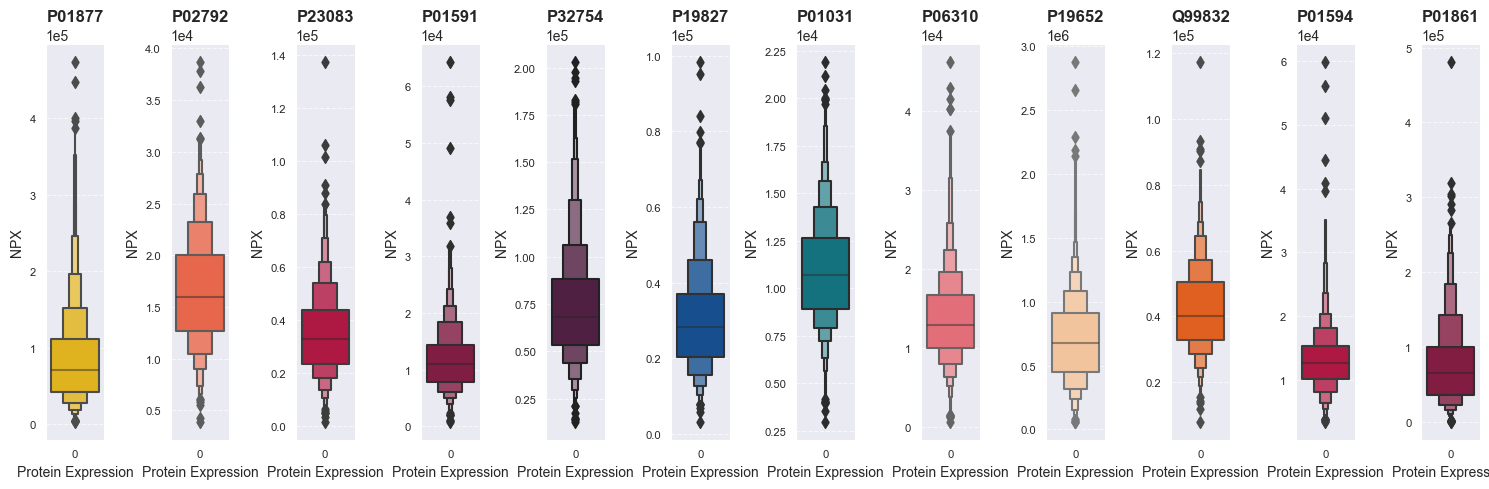

In [27]:
# proteins = proteins_df['UniProt'].unique()
proteins = list(protein_visited_again)
examine_proteins = 12

fig, axes = plt.subplots(1, 12, figsize=(15, 5))

colors = ["#FFC300", "#FF5733", "#C70039", "#900C3F", "#581845", "#034EA2", "#028090", "#F45B69","#FFC390", "#FF5600", "#C60039", "#900C3D"]

for i in range(examine_proteins):
    
    ax = plt.subplot(1, 12, i + 1)
    splot = sns.boxenplot(proteins_df[proteins_df['UniProt'] == proteins[i]]['NPX'].values, color=colors[i])
    ax.set_title(proteins[i], fontsize=12, fontweight='bold')
    ax.set_xlabel('Protein Expression', fontsize=10)
    ax.set_ylabel('NPX', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    sns.despine(top=True, right=True)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

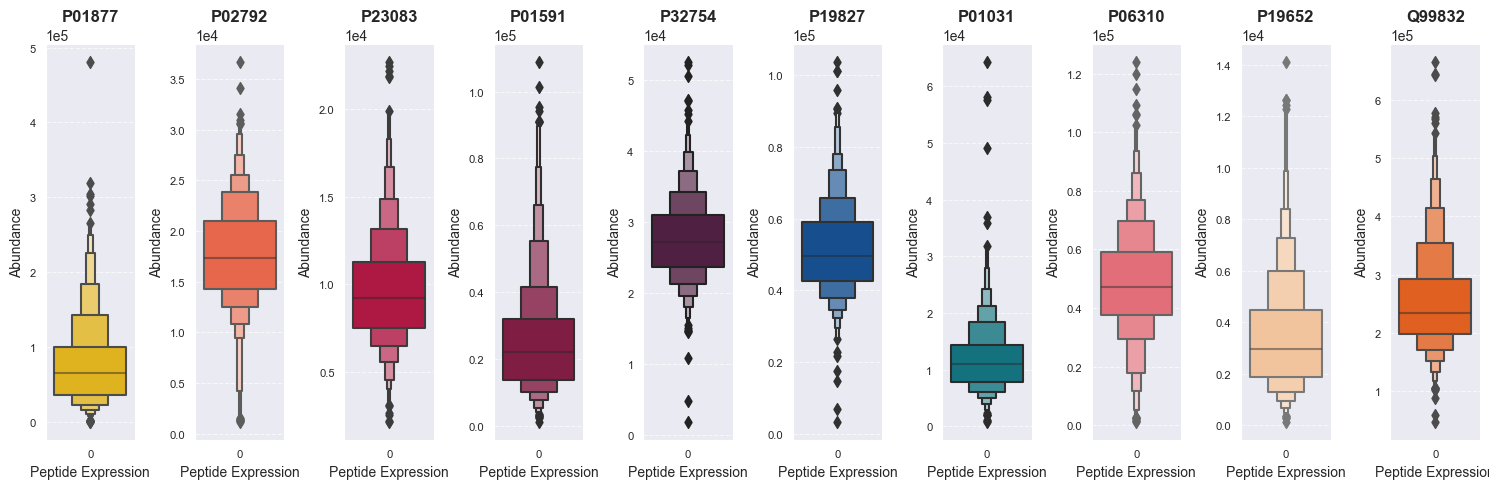

In [28]:
peptide = list(peptide_visited_again)
examine_p = 10

fig, axes = plt.subplots(1, 10, figsize=(15, 5))

colors = ["#FFC300", "#FF5733", "#C70039", "#900C3F", "#581845", "#034EA2", "#028090", "#F45B69","#FFC390", "#FF5600"]

for i in range(examine_p):
    
    ax = plt.subplot(1, 10, i + 1)
    splot = sns.boxenplot(peptides_df[peptides_df['Peptide'] == peptide[i]]['PeptideAbundance'].values, color=colors[i])
    ax.set_title(proteins[i], fontsize=12, fontweight='bold')
    ax.set_xlabel('Peptide Expression', fontsize=10)
    ax.set_ylabel('Abundance', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    sns.despine(top=True, right=True)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

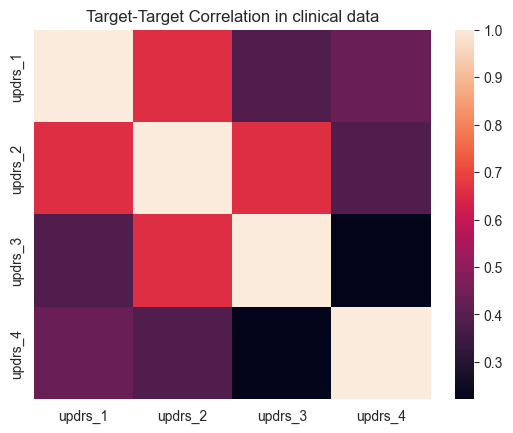

In [29]:
clinical_targets_corr = clinical_df.dropna(subset=['updrs_1','updrs_2','updrs_3','updrs_4']).reset_index(drop=True)[['updrs_1','updrs_2','updrs_3','updrs_4']].corr()
ax = sns.heatmap(clinical_targets_corr)
ax.set_title('Target-Target Correlation in clinical data')
plt.show()

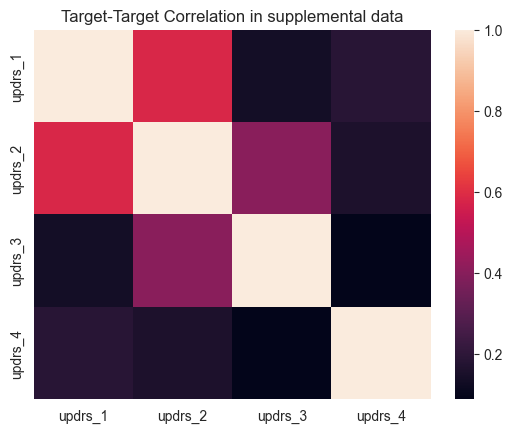

In [30]:
supplemental_targets_corr = supplemental_df.dropna(subset=['updrs_1','updrs_2','updrs_3','updrs_4']).reset_index(drop=True)[['updrs_1','updrs_2','updrs_3','updrs_4']].corr()
ax = sns.heatmap(supplemental_targets_corr)
ax.set_title('Target-Target Correlation in supplemental data')
plt.show()


Text(0.5, 1.0, 'UPDRS_4')

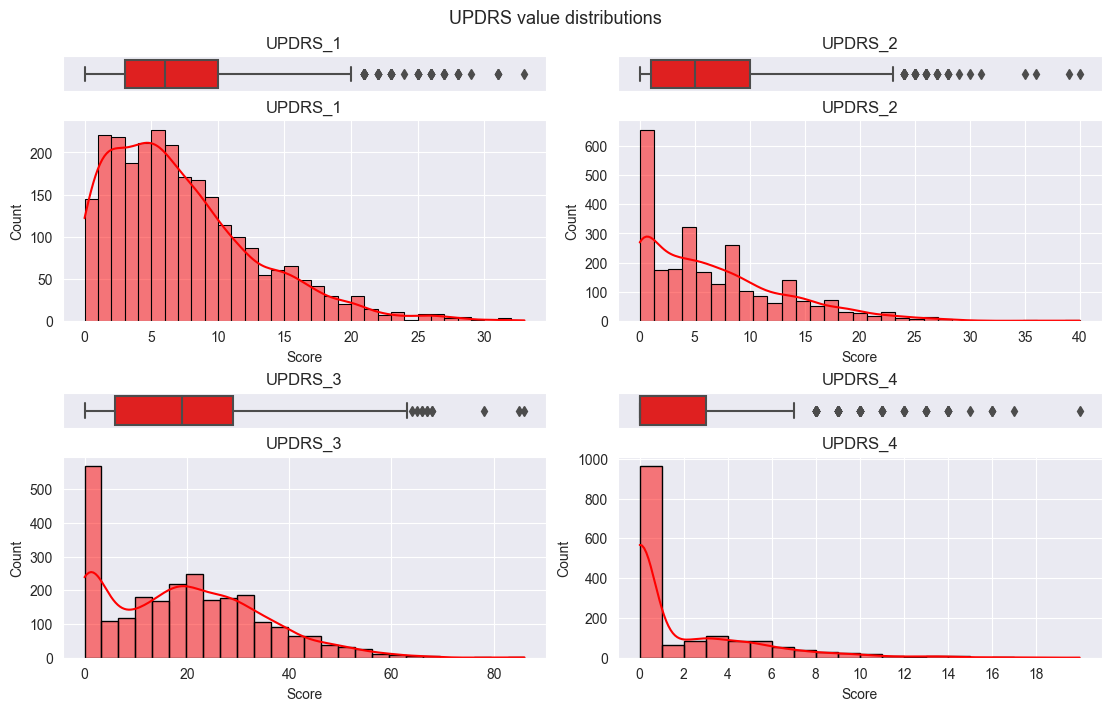

In [31]:
colors = ["red", "blue", "green"]
sns.set_palette(sns.color_palette(colors))

f, axes = plt.subplots(4, 2, layout="constrained",
                        gridspec_kw={"height_ratios": (.15, .85, .15, .85)}, figsize=(11, 7))

f.suptitle('UPDRS value distributions', fontsize=13)

splot = sns.boxplot(ax=axes[0][0], x=clinical_df['updrs_1'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_1')

splot = sns.boxplot(ax=axes[0][1], x=clinical_df['updrs_2'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_2')

splot = sns.boxplot(ax=axes[2][0], x=clinical_df['updrs_3'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_3')

splot = sns.boxplot(ax=axes[2][1], x=clinical_df['updrs_4'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_4')

splot = sns.histplot(ax=axes[1][0], x=clinical_df['updrs_1'], kde=True, alpha=0.5, ec='black')
splot.set_xlabel('Score')
splot.set_ylabel('Count')
splot.set_title('UPDRS_1')

splot = sns.histplot(ax=axes[1][1], x=clinical_df['updrs_2'], kde=True, alpha=0.5, ec='black')
splot.set_xlabel('Score')
splot.set_ylabel('Count')

splot.set_title('UPDRS_2')

splot = sns.histplot(ax=axes[3][0], x=clinical_df['updrs_3'], kde=True, alpha=0.5, ec='black')
splot.set_xlabel('Score')
splot.set_ylabel('Count')
splot.set_title('UPDRS_3')

splot = sns.histplot(ax=axes[3][1], x=clinical_df['updrs_4'], kde=True, bins=range(0, 20), alpha=0.5, ec='black')
splot.set_xticks(range(0, 20, 2))
splot.set_xlabel('Score')
splot.set_ylabel('Count')
splot.set_title('UPDRS_4')

Text(0.5, 1.0, 'UPDRS_4')

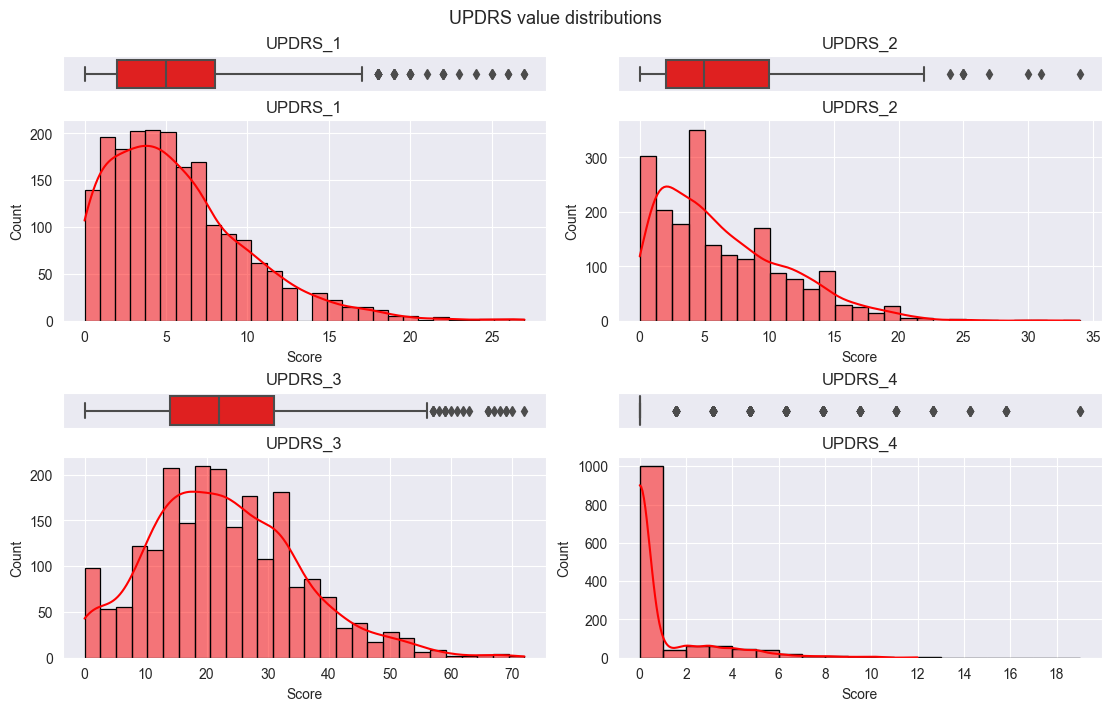

In [32]:
colors = ["red", "blue", "green"]
sns.set_palette(sns.color_palette(colors))

f, axes = plt.subplots(4, 2, layout="constrained",
                        gridspec_kw={"height_ratios": (.15, .85, .15, .85)}, figsize=(11, 7))

f.suptitle('UPDRS value distributions', fontsize=13)

splot = sns.boxplot(ax=axes[0][0], x=supplemental_df['updrs_1'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_1')

splot = sns.boxplot(ax=axes[0][1], x=supplemental_df['updrs_2'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_2')

splot = sns.boxplot(ax=axes[2][0], x=supplemental_df['updrs_3'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_3')

splot = sns.boxplot(ax=axes[2][1], x=supplemental_df['updrs_4'])
splot.axes.get_xaxis().set_visible(False)
splot.set_title('UPDRS_4')

splot = sns.histplot(ax=axes[1][0], x=supplemental_df['updrs_1'], kde=True, alpha=0.5, ec='black')
splot.set_xlabel('Score')
splot.set_ylabel('Count')
splot.set_title('UPDRS_1')

splot = sns.histplot(ax=axes[1][1], x=supplemental_df['updrs_2'], kde=True, alpha=0.5, ec='black')
splot.set_xlabel('Score')
splot.set_ylabel('Count')
splot.set_title('UPDRS_2')

splot = sns.histplot(ax=axes[3][0], x=supplemental_df['updrs_3'], kde=True, alpha=0.5, ec='black')
splot.set_xlabel('Score')
splot.set_ylabel('Count')
splot.set_title('UPDRS_3')

splot = sns.histplot(ax=axes[3][1], x=supplemental_df['updrs_4'], kde=True, bins=range(0, 20), alpha=0.5, ec='black')
splot.set_xticks(range(0, 20, 2))
splot.set_xlabel('Score')
splot.set_ylabel('Count')
splot.set_title('UPDRS_4')



In [33]:
from matplotlib.ticker import MaxNLocator



In [37]:


clinical_df.groupby('visit_month').mean()['updrs_1']

f, axes = plt.subplots(1, 4, figsize=(16, 3))

f.suptitle('UPDRS mean distributions', fontsize=13)

splot = sns.regplot(ax=axes[0], x='visit_month', y='updrs_1', data=clinical_df.groupby('visit_month', as_index=False).mean(),
                    color='red', scatter_kws={'alpha': 0.5})
splot.set_xlabel('Visit Month')
splot.set_ylabel('UPDRS Score')
splot.set_title('UPDRS 1')

splot = sns.regplot(ax=axes[1], x='visit_month', y='updrs_2', data=clinical_df.groupby('visit_month', as_index=False).mean(),
                    color='blue', scatter_kws={'alpha': 0.5})
splot.set_xlabel('Visit Month')
splot.set_ylabel('UPDRS Score')
splot.set_title('UPDRS 2')

splot = sns.regplot(ax=axes[2], x='visit_month', y='updrs_3', data=clinical_df.groupby('visit_month', as_index=False).mean(),
                    color='green', scatter_kws={'alpha': 0.5})
splot.set_xlabel('Visit Month')
splot.set_ylabel('UPDRS Score')
splot.set_title('UPDRS 3')
axes[2].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[2].locator_params(axis='y', nbins=6)

splot = sns.regplot(ax=axes[3], x='visit_month', y='updrs_4', data=clinical_df.groupby('visit_month', as_index=False).mean(),
                    color='orange', scatter_kws={'alpha': 0.5})
splot.set_xlabel('Visit Month')
splot.set_ylabel('UPDRS Score')
splot.set_title('UPDRS 4')

plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'str'